## Rendu 2: Rapport de modélisation

#### 1. Introduction
   - Présentation du but du document.
   - Présentation du projet à nouveau
   - Description des classes à classifier

#### 2. Méthodologie
   - Description de l'approche choise (axe cnn et axe nlp).
   - Explication des interets/necessité de chaque axe.

#### 3. Entraînement du CNN.
   - CNN testés et résultats obtenus.
   - CNN retenu et tweaking.
   - Présentation des résultats obtenus.
   - Interprétabilité

#### 4. Choix de la librairie OCR.
   - Présentation de la librairie OCR choisie et justification.
   - Présentation des résultats de l'extraction.

#### 5. Entraînement du modèle de NLP.
   - Modèles testés et résultats obtenus.
   - Modèle retenu et tuning des hyperparamètres.
   - Présentation des résultats obtenus.
   - Interprétabilité

#### 6. Mise en place du modèle de voting
   - Explication de l'interet.
   - Description du modèle de vote retenu.
   - Présentation des resultats du modèle (rappel des résultats des modèles seuls).

#### 7. Conclusion
   - Résumé des résultats obtenus.
   - axe d'amélioration.

#### 1. Introduction

Le projet vise à classifier des documents scannés en 16 classes différentes. Les types de document à classifier sont: lettre, formulaire, email, manuscrit, publicité, rapport sceintifique, publication scientifique, specification, dossier, article de journal, budget, facture, presentation, questionnaire, cv et memo.

Une approche en deux axes principaux a été retenue:
- L’axe 1 est basé sur la classification visuelle des documents à l’aide d’un réseau de neurones convolutif (CNN).
- L'axe 2 est basé sur la classification du texte extrait des documents à l’aide d’un modèle de traitement du langage naturel (NLP).

Ensuite, nous constituerons un modèle de vote pour améliorer les performances des modèles individuels.

Ce document a pour object la présentation des process et modèles de machines learning sélectionnés ainsi que les résultats obtenus ou les complications observées.

#### 2. Méthodologie

L’approche choisie pour ce projet est une combinaison de deux axes principaux : la classification visuelle et la classification textuelle.

La classification visuelle, implique l’utilisation d’un réseau de neurones convolutif (CNN). 
Les couches de neurones convolutives des CNN les rendent très efficaces pour traiter les images.
L'idée ici est d'apprendre à un CNN a reconnaitre certaines charactéristique des documents qui permettraient de les classifier.
Par exemple on peut imaginer qu'un document qui présente de nombreuses lignes verticales et horizontales à plus de chances d'etre une facture ou un rapport scientifique qu'une publicité.
Nos CNN ont été entrainés sur un ensemble de documents scannés étiquetés du dataset RVL-CDIP.
Notre espoir est qu'on puisse arriver à un score d'accuracy correct simplement en utilisant des indices visuels avec cette technique.

La classification textuelle, est basé sur le traitement du langage naturel (NLP). 
Pour cela, nous avons d’abord utilisé une librairie OCR pour extraire le texte des documents scannés.
Ensuite, nous avons entraîné un modèle de NLP sur le texte extrait pour classer les documents en fonction de leur contenu textuel.
La quantitié de mots, la présence ou fréquence de mots particuliers peuvent être de bon indicateurs pour classifier un document. 
Par exemple l'apparition du mot "invoice" serait un bon indicateur que le document est une facture.

Enfin, pour améliorer les performances de nos modèles individuels, nous avons mis en place un modèle de vote. 
Ce modèle prend en compte les prédictions de nos deux modèles (CNN et NLP) et décide de la classe finale du document en se basant sur ces prédictions.
Cette approche nous permet de prendre en compte les forces et faiblesses de chaque modèle et d’améliorer la précision globale de notre classification.

![alt text](../data/visualization/full_models.png)

#### 3. Entraînement du CNN.

##### 3.1 CNN testés et résultats obtenus

Plusieurs architectures de CNN ont été testées dans le cadre de ce projet. Chaque modèle a été évalué en fonction de son accuracy sur un ensemble d'entrainement de 20000 documents. 

Nous avons commencé par tester des modeles simple puis nous avons tenté de le complexifier afin d'accroitre la précision du modele.

3.1.1 Modélisation d'un CNN simple

On a tout d'abord testé un modele simple avec un dataset de 1000 images.

![CNN simple](../data/visualization/CNN_simple.png)

Les couches de convolution et de max pooling permettent de faire ressortir les elements differentiants. Les couches linéaires permettent de repasser des 2 Millions de paramètres aux 16 classes à predire.

On réalise l'entrainement du modele sur 10 epochs, ce qui prend 85min d'entrainement.
Malheureusement le coût n'est pas réduit et reste stable autour de 2.8 avec un optimizer SGD avec un learning rate de 1e-3

On obtient une precision de 3% ce qui est inferieur à un tirage au hazard qui aurait une probabilité de 6%

![CNN simple accuracy](../data/visualization/CNN_v0_accuracy.png)

Le modele ne semble pas faire ressortir suffisamment d'informations pour pouvoir differencier les differents types de documents.
Deux possibilitées s'offrent à nous : 
- Augmenter le dataset pour que le modele puisse mieux aprehender les differentes classes
- Augmenter le nombre d'epoques d'apprentissage afin de réduire le coût et améliorer la precision
- Augmenter le nombre de couches neuronales afin d'accroitre le nombre d'informations et de details pour mieux distinguer les differentes classes

Augmenter le nombre d'epoques ne ferait qu'overfitter le modele et n'améliorerait la precision que sur le dataset d'entrainement.
Augmenter le dataset reste peut concluant car il augmenterait le temps d'apprentissage sans apporter d'informations supplementaires sur le dataset.

On privilégie l'ajout de couches supplémentaires afin d'accroitre le niveau d'information même s'il ajoutera du temps de traitement

3.1.2 Modélisation d'un CNN complexe

On teste toujours avec un dataset de 1000 images pour detecter une meilleure classification qui serait bien du à l'ajout de couche et non à l'augmentation du dataset.

On part d'une couche sequentielle assez simple :
![CNN complexe - couche sequentielle](../data/visualization/Sequentiel_complexe.png)

Cette couche est la base du systeme neuronal avec la possibilité d'ajouter dans les couches plus profondes des modules Conv2D + ReLu supplémentaires afin d'accroitre l'importance des elements differenciants.

On ajoute dans la partie linéaire des modules DropOut afin d'éviter overfitting si l'on augmente le nombre d'epoques d'apprentissage
![CNN complexe - couche sequentielle](../data/visualization/CNN_complexe.png)


On réalise l'entrainement du modele sur 15 epochs, ce qui prend 485min d'entrainement.
Le coût est réduit progressivement ce qui est encourageant avec un optimizer SGD avec un learning rate de 1e-3.
A la vue de la trajectoire, il faudrait augmenter le nombre d'epoques afin d'atteindre un minimum local pour la fonction de coût.


![CNN complexe accuracy](../data/visualization/Apprentissage_CNN_3_layers.png)

On obtient une precision de 33% ce qui est encourageant pour afiner le modèle.

![CNN complexe accuracy](../data/visualization/CNN_v1_accuracy.png)



On remarque que certains documents comme les emails, les publicités, les dossiers et les cahiers des charges sont assez biens detectés car assez distincts des autres documents. Cependant les documents qui ne contienent pas que du texte ou à l'inverse que des images ou même pas de texte sont eux difficilement catégorisables.
Ainsi les budgets, rapports, presentations et questionnaires qui melent des elements simmilaires et des mises en pages qui ne leurs sont pas propres sont difficilement différenciés par le modele.

Afin d'améliorer le modele, on pourra augmenter le nombre d'epoques d'apprentissages, augmenter aussi la taille du dataset pour diversifier le type de document et enfin augmenter le nombre de couches afin d'aumenter le nombre de paramètres et ainsi afiner le modele.

Malheureusement, le facteur temps risque d'accroitre déraisonnablement en augmentant le nombre de couche, d'epoques et la taille du dataset.

On s'interesse alors au transfert de connaissance pour trouver un modele qui pourrait être plus performant sur lequel on pourrait ajouter un classifieur ou des couches neuronales pour afiner le modele.

3.2.1 Modele par transfert de connaissance

- **Modèle transfert learning** : EfficientNet

On s'interesse aux differents modeles de classifications utilisant des reseaux de neurones. On remarque qu'un modele en particulier se differencie des autres modeles :

![Utilisation des modeles de deep learning dans les papiers de recherche](../data/visualization/Models_usage.png)
    
On remarque EfficientNet comme un modele devenu préponderant et majoritaire, suivi de ResNet

description, nombre et nature des couches

petit schema du modèle ?

Resultats obtenus

insérer la matrice de confusion ?

petite conclusion sur ce modèle

Cela est du principalement à la forte précision du modele pour un faible nombre de parametres en sortie et donc de couches neuronales. Le modele est performant dans la classification d'image mais aussi dans tout autre probleme de classification

![EfficientNet accuracy](../data/visualization/efficient_net_vs_other_models.png)

![loss_cnn](./../data/visualization/Architecture-of-EfficientNet-B0.png)

- **Modèle 2** : Efficient Net B0

    - B0
    - B0 avec des couches de convolutions supplémentaires dans le reseau de neuronnes
    - B0 avec des couches linéaires supplémentaires
    
description, nombre et nature des couches

petit schema du modèle ?

Resultats obtenus

insérer la matrice de confusion ?

petite conclusion sur ce modèle

- **Modèle 3** : Efficient Net B1

    - B1
    - B1 avec un dataset 2 fois plus grand
    
description, nombre et nature des couches

petit schema du modèle ?

Resultats obtenus

insérer la matrice de confusion ?

petite conclusion sur ce modèle

![loss_cnn](./../data/visualization/EfficientNet_loss.png)

##### 3.2 CNN retenu et tweaking

Après avoir comparé les performances des différents modèles, nous avons choisi le Modèle machin pour notre classification. 
Ce modèle a montré une bonne performance de X sur l'ensemble d'entrainement.

Une fois le modèle sélectionné, nous avons tenté de l'optimiser de cette façon:

##### 3.3 Présentation des résultats obtenus

Nous arrivons à un modèle final dont les résultats sont les suivants :


![CNN complexe accuracy](../data/visualization/Efnet_b1_big_train_accuracy.png)

##### 3.4 Interprétabilité

Nous avons utilisé une technique appelée gradCAM pour visualiser les régions de l’image qui ont été les plus influentes pour la prédiction du modèle.

On voit par exemple que pour les XXX le réseau de neurone se concentre surtout sur XXX.

Ce type d’analyse visuelle, comme nous l’avons vu, est très efficace, mais montre ses limites lorsque les documents sont visuellement similaires. Par conséquent, l’utilisation d’un modèle basé sur le texte contenu dans le document, nous l’espérons, nous permettra de discriminer plus efficacement les classes qui sont visuellement similaires

#### 4. Choix de la librairie OCR.

##### 4.1 Présentation de la librairie OCR choisie et justification

Pour l'extraction du texte à partir des documents scannés, nous avons choisi d'utiliser Pytesseract.
Cette librairie a été choisie parmis les librairies Pytesseract, Keras-ocr et easyocr pour plusieurs raisons:
- Il s'agit actuellement du standard de l'industrie.
- Une batterie de test a été faite sur un autre jeu de donnée dont le texte avait déja été extrait et les résultats des différents OCR ont été comparés au texte réel.

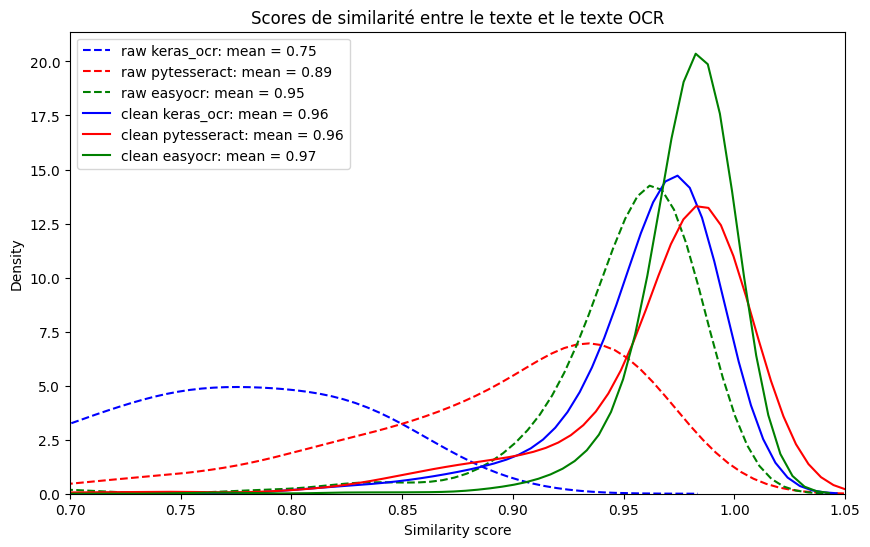

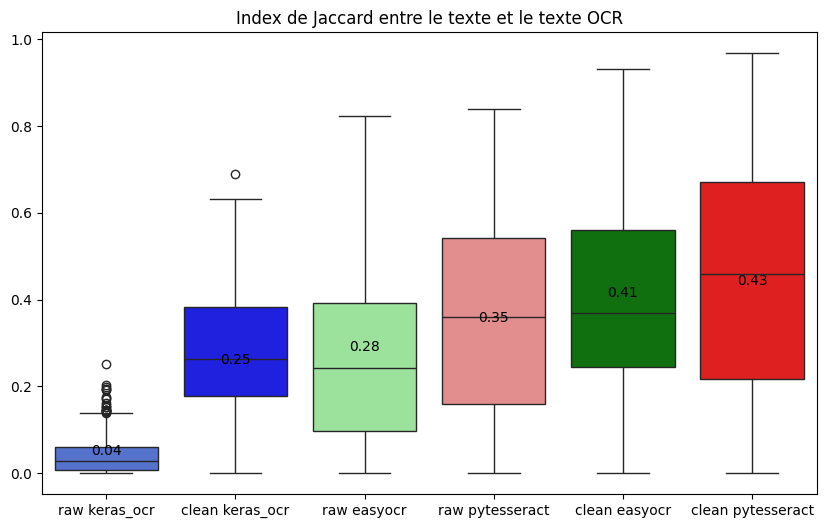

A noter cependant plusieurs bémols:
- La librairie d'ocr a été benchmarkée en utilisant un jeu de donnée similaire au jeu de données principal. Ce jeu de données était associé à du texte lui même issu d'un ocr. Ocr qui était parfois approximatif. Nous avons donc tenté de nous approcher d'un texte de référence imparfait plutot que sur le texte réel des documents.
- Après l'ocr et le nettoyage du texte, nous nous retrouvons comme pour le jeu de données du benchmark avec du texte inexacte dans de nombreux cas. Ce fait va forcément impacter les résultats des modèles de NLP.

##### 4.2 Présentation des résultats de l'extraction

Après avoir utilisé Pytesseract sur le jeu de données, nous avons récupéré un ensemble de texte brut.
Le préprocessing du texte extrait s'est fait en plusieurs étapes dont les principales sont :
- suppression des characteres speciaux
- suppression des stop words
- suppression des mots qui n'existent pas
- lemmatization
- suppression des mots qui apparaissent moins de n fois dans tous le corpus de texte

A la fin du preprocessing nous nous retrouvons avec 20000 listes de mots qui serviront de base à l'entrainement des modèles de NLP.

#### 5. Entraînement du modèle de NLP.

##### 5.1 Modèles testés et résultats obtenus

Plusieurs modèles de NLP ont été testés dans le cadre de ce projet. Chaque modèle a été évalué en fonction de son accuracy sur un ensemble d'entrainement de 20000 documents. On a décidé de se séparer rapidement des modèles Naive Bayes et Decision Tree qui avaient les moins bons résultats, pour se concentrer sur les modèles Logistic Regression, SVM and Random Forest pour optimiser les hyperparamètres sur un échantillon de 1000 documents cette fois-ci.

De plus des modèles basés sur la sémantique (word2vec, Bert et GPT) ont rapidement été écartés car ils ne produisaient pas de bons résultats. On suppose que cela vient du fait que les tokenizers n'etaient pas capable de travailler correctement avec les mots inconnus présents en grand nombre dans le texte à ce point.

Nous avons utilisés une approche bag of word et une approche tf-idf pour la vectorisation des textes. Ces deux approches sont interchangeables pour tous les modèles testés, la différence dans les métriques étant anecdotique. Nous avons utilisé l'approche tf-idf pour la vectorisation.

- **Modèle 1 : Logistic Regression**

On a testé les modèles de Logistic Regression à 3 niveaux : Lasso, Ridge et Elastic Net.

Les hyperparamètres optimaux sont : 
- Ridge ("l2" penalty) : accuracy = 0.542714, F1 score = 0.529005, best parameters = {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
- Lasso ("l1" penalty) : accuracy = 0.542714, F1 score = 0.53466, best parameters = {'C': 100, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
- Elastic Net ("elasticnet" penalty) : accuracy = 0.557789, F1 score = 0.551118, best parameters = {'C': 100, 'l1_ratio': 0.1, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}

Au vu des résultats, on décide de conserver le modèle Logistic Regression "Elastic Net". Pour les hyperparamètres optimaux, on peut partir de ceux-là "{'C': 100, 'l1_ratio': 0.1, 'max_iter': 5000, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.01}" où retenter un GridSearch sur un échantillon plus conséquent.

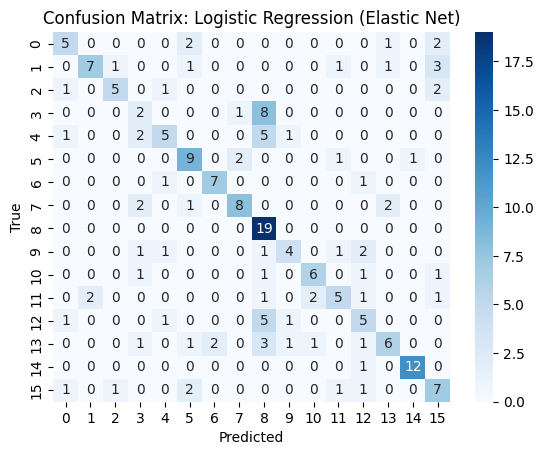
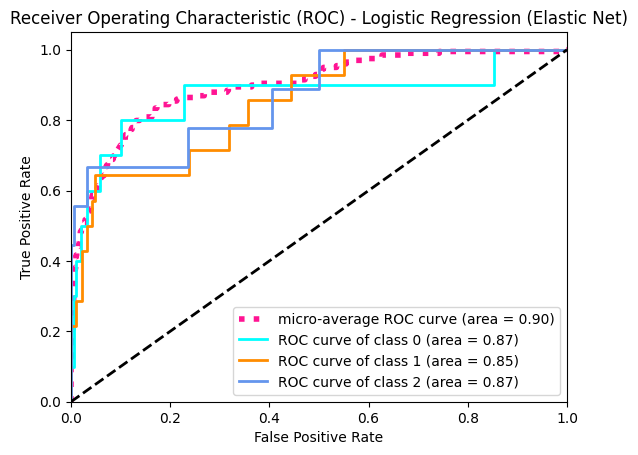

- **Modèle 2 : SVM**

Les hyperparamètres optimaux sont : accuracy = 0.567839, F1 score = 0.564915, best parameters = {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}.

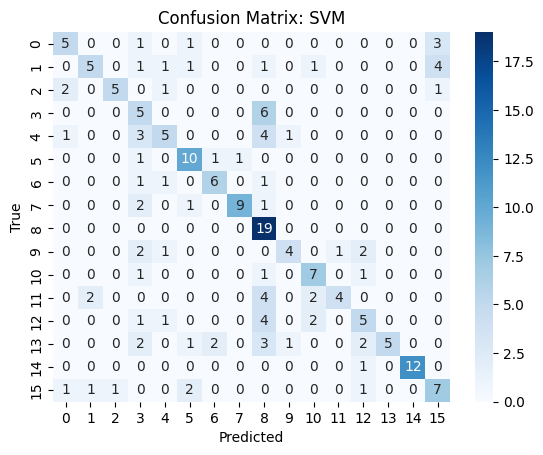

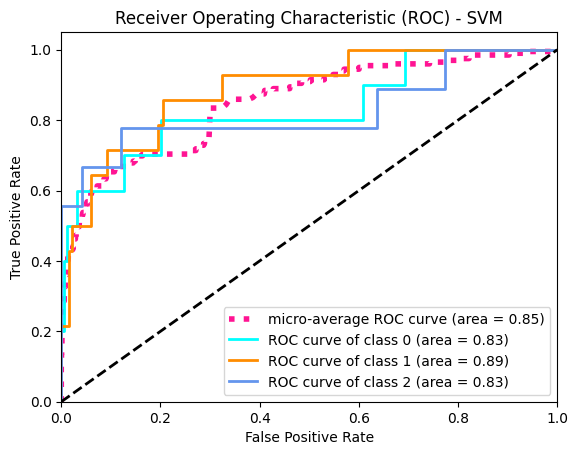

- **Modèle 3 : Random Forest**

Les hyperparamètres optimaux sont : accuracy = 0.572864, F1 score = 0.564937, best parameters = {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}.

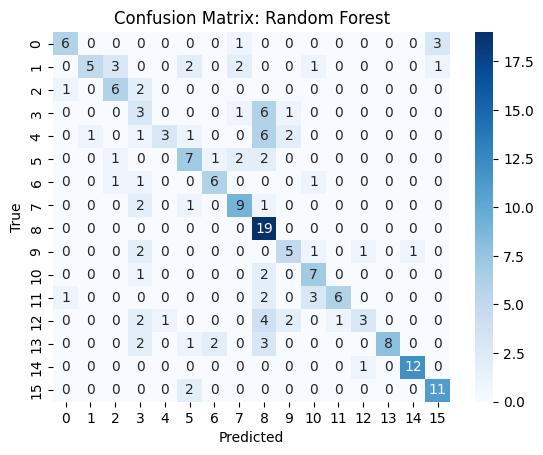
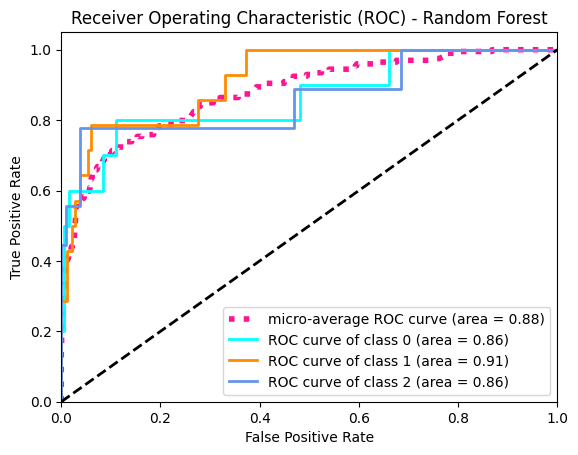

##### 5.2 Modèle retenu et tuning des hyperparamètres

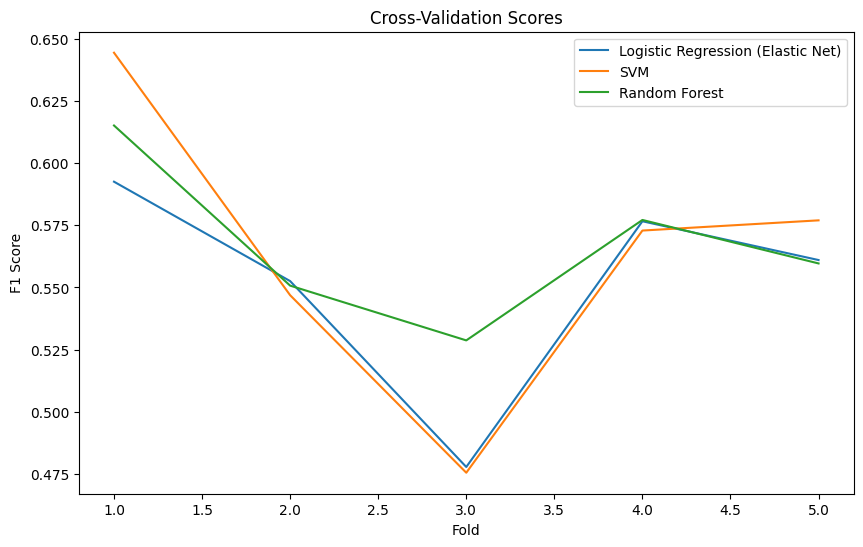

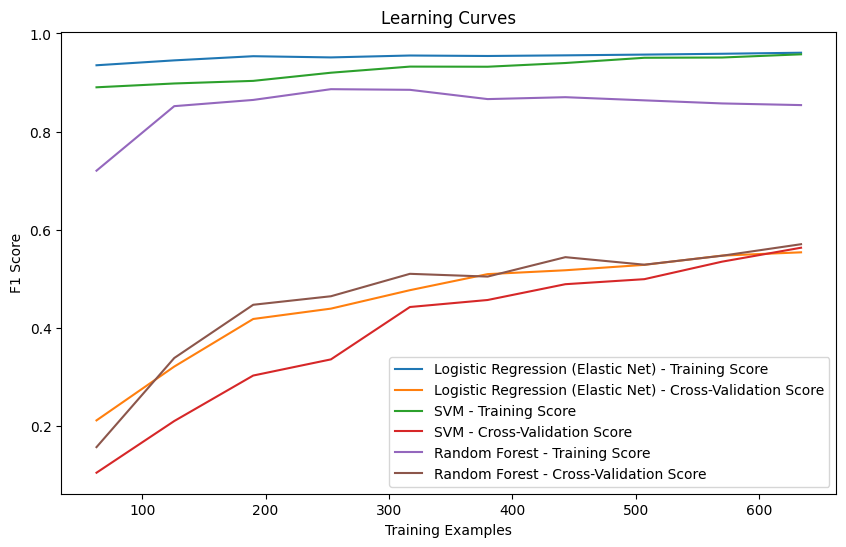


Après avoir comparé les performances des différents modèles, nous avons choisi le modèle de regression logistique pour notre système de classification.
Ce modèle a montré une accuracy de 54% sur les 1000 documents de l'ensemble d'entrainement. Les autres modèles ont des résultats similaires mais s'avereront moins compatibles avec le modèle utilisant un CNN choisi précédemment.

##### 5.3 Présentation des résultats obtenus

Nous arrivons à un modèle final dont les résultats sont les suivants pour un jeu d'entrainement de 20000 textes cette fois :

- Accuracy : 0.67
- F1-Score : 0.68

![alt text](../data/visualization/cm_nlp.png)

On constate une accuracy de 67% qui n'est pas mal.
On constate également que certaines classes de documents sont plus difficile que d'autres à classifier pour ce modèle.
Par exemple les classes 3, 4, 10 et 12 (correspondant respectivement à handwritten, advertisement, budget et presentation) sont souvent prédites comme faisant partie de la classe 8 (file folder).

##### 5.4 Interprétabilité

Suite à l'entrainement du modèle de regression logistique, un poids a été associé à chaque mots possible pour chaque classe. Ces poids indiquent l’importance du mot pour la prédiction des classes. Donc en examinant simplement les poids du modèle entrainé, on peut comprendre quels mots sont les plus importants pour la prédiction de chaque classe. Cela rend l’interprétabilité de ce modèle très simple.

Nous avons choisi d’utiliser une représentation visuelle sous forme de wordcloud des mots les plus importants pour chaque classes.

Par exemple, pour les classes Leter et Invoice, les mots ayant le plus grand poids dans la prédiction sont les suivants.

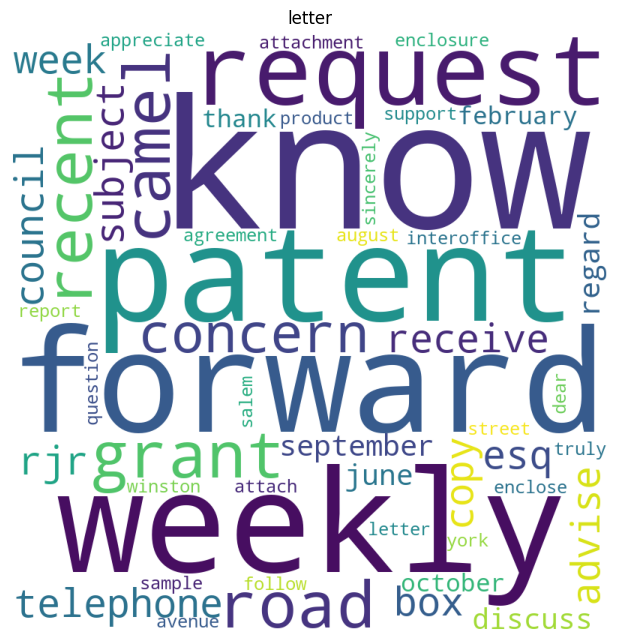

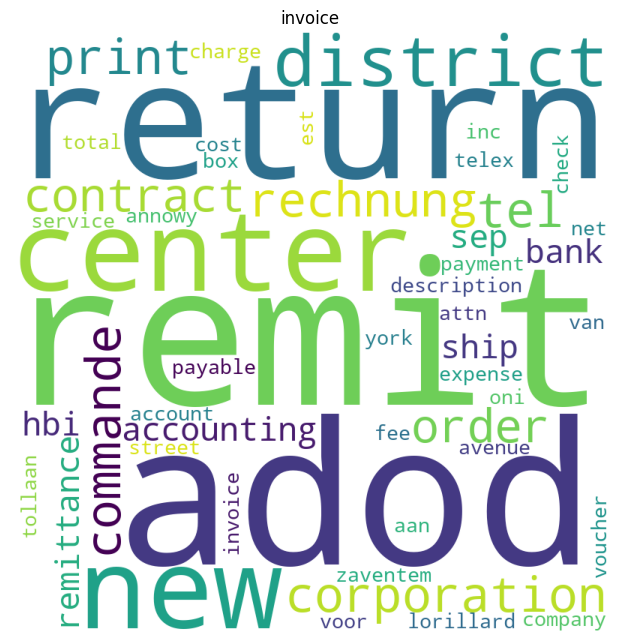

Cette analyse nous permet de visualiser quels sont les mots que notre modèle associe à chaque classe. Cependant, tout comme pour l’analyse visuelle avec le CNN, cette méthode montre ses limites lorsque les documents contiennent des mots similaires mais appartiennent à des classes différentes. C’est pourquoi les prédictions de notre modèle de NLP et notre modèle CNN ont été combinées pour obtenir une prédiction on l'espere plus précise.

#### 6. Mise en place du modèle de vote

##### 6.1 Explication de l'intérêt

L'utilisation d'un modèle de vote a plusieurs avantages.
- Cela permet de combiner les forces du modèle de CNN qui sera plus performant pour classifier un document selon son arrangement global et du modèle de NLP qui sera lui performant pour analyser le texte du document.
- Cela permet également de mitiger les erreurs eventuelles qu'un des deux modèles pourrait faire.

Nous esperons obtenir une meilleure accuracy global en combinant les modèles qu'avec les modèles seuls.

##### 6.2 Description du modèle de vote retenu

Pour le voting, nous avons choisi d'utiliser le modèle de classification par NLP utilisant la régression logistique. Ce n'est pas le modèle le plus performant, mais il s'est avéré plus complémentaire avec le modèle utilisant un CNN en terme d'accuracy des résultats.

Nous avons choisi d'utiliser un modèle de vote X dit "faible".
Ce type de modèle prend en compte les probabilités de chaque classe prédite par nos modèles.
Il assemble ces probabilités pour obtenir une nouvelle liste de probabilité pour chaque classe. La classe la plus probable est alors renvoyée comme prediction du modèle.
Un système de pondération des probabilités des deux modèle a également été entrainé de façon à ce que les prédictions d'un modèle performant sur une classe en particulier soient avantagées par rapport à l'autre modèle.

##### 6.3 Présentation des résultats du modèle

Après la mise en place du modèle de vote, nous avons évalué ses performances sur un ensemble de test de 4000 documents.
Les résultats obtenus sont les suivants :

- Accuracy: 0.8475
- F1 Score: 0.8479

![alt text](../data/visualization/cm_voting.png)

Pour rappel, voici les performances des modèles individuels :

- CNN accuracy: 0.8192
- NLP accuracy: 0.6795
- CNN F1 Score: 0.8196
- NLP F1 Score: 0.6884

On constate donc une amélioration substantielle de l'accuracy suite au voting.

#### 7. Conclusion

##### 7.1 Résumé des résultats obtenus

En combinant des modèles de classification visuelle et de classification textuelle, et en utilisant un modèle de vote pour combiner ces deux approches, nous avons réussi à obtenir une accuracy proche de 85%.

Cette approche hybride nous a permis de tirer parti des forces de chaque modèle, maximisant ainsi notre capacité à classer correctement les documents.

Le CNN a permis l’identification des caractéristiques visuelles uniques des documents (formatage, presence de colonnes ...etc), tandis que la NLP a été efficace pour comprendre le contenu du texte.
Le modèle de vote a ensuite servi de mécanisme de confirmation/arbitrage, pondérant les probabilités prédites par chaque modèle en fonction de leur pertinence pour chaque classe.



##### 7.2 Axe d'amélioration

La difficulté principale du côté de l'approche NLP a été le preprocessing des documents en vue d'en obtenir le texte (OCR). La qualité des documents rendait difficile la lecture par la libairie d'ocr. La librairie utilisée n'etait pas toujours en mesure de produire le texte exacte du document et produisait très souvent des mots inexactes. Il serait certainement possible de pousser le prétraitement des images pour les rendres plus aptes à être lus par la librairie d'ocr.
On pourrait par exemple imaginer de remplacer des mots inexistant par le mot le plus proche dans la langue détectée.

Nous avons également constaté comme on peut s'y attendre qu'augmenter la taille du jeu d'entrainement améliorait les metriques évaluées. On pourrait certainement utiliser un jeu d'entrainement plus grand pour encore améliorer ces métriques. Il a cependant été observé des rendements décroissants en utilisant cette approche lors des phases d'entrainement.

#### 8. Bisou